In [1]:
import numpy as np
from pylab import *
from craco.cardcap import CardcapFile
from astropy.io import fits

%matplotlib notebook

In [73]:
# problem is only some of the cards got to the full 550 MB
!ls -lh data/SB40178/v6/*v6*.fits


-rw-rw-r-- 1 ban115 ban115 950K May 31 17:28 data/SB40178/v6/vela_b0_v6_b07_c03.fits
-rw-rw-r-- 1 ban115 ban115 451M May 31 17:28 data/SB40178/v6/vela_b0_v6_b07_c04.fits
-rw-rw-r-- 1 ban115 ban115 548M May 31 17:28 data/SB40178/v6/vela_b0_v6_b07_c05.fits
-rw-rw-r-- 1 ban115 ban115  17K May 31 17:28 data/SB40178/v6/vela_b0_v6_b07_c06.fits
-rw-rw-r-- 1 ban115 ban115 553M May 31 17:28 data/SB40178/v6/vela_b0_v6_b07_c07.fits
-rw-rw-r-- 1 ban115 ban115 950K May 31 17:28 data/SB40178/v6/vela_b0_v6_b07_c08.fits
-rw-rw-r-- 1 ban115 ban115  17K May 31 17:28 data/SB40178/v6/vela_b0_v6_b07_c09.fits
-rw-rw-r-- 1 ban115 ban115 545M May 31 17:28 data/SB40178/v6/vela_b0_v6_b07_c10.fits
-rw-rw-r-- 1 ban115 ban115  94M May 31 17:28 data/SB40178/v6/vela_b0_v6_b07_c11.fits
-rw-rw-r-- 1 ban115 ban115  95M May 31 17:28 data/SB40178/v6/vela_b0_v6_b07_c12.fits


In [75]:
cc = [CardcapFile(f'data/SB40178/v6/vela_b0_v6_b07_c{c:02d}.fits') for c in range(3,12+1)]
pkts = [ccf.load_packets() for ccf in cc]

In [90]:
for ccf, pk in zip(cc, pkts):
    h = ccf.mainhdr
    p1 = pk[0]
    print('\t'.join(map(str, (h['CARD'], h['NOWSTR'], len(pk), p1['version'],p1['frame_id'], hex(p1['frame_id']), p1['bat'], hex(p1['bat']),p1['beam_number'], p1['sample_number'])))),

3	2022-05-30T07:03:04.844	256	2004071455	74117120	0x46af000	602960924697	0x8c63459019	0	0
4	2022-05-30T07:03:04.844	125952	2004071455	74117120	0x46af000	602960924697	0x8c63459019	0	0
5	2022-05-30T07:03:04.844	153088	2004071455	74172416	0x46bc800	602963910681	0x8c63732019	0	0
6	2022-05-30T07:03:04.844	1	16777344	72057594037928064	0x100000000000080	72057594037928064	0x100000000000080	1	1
7	2022-05-30T07:03:04.844	154368	2004071455	74117120	0x46af000	602960924697	0x8c63459019	0	0
8	2022-05-30T07:03:04.844	256	2004071455	74117120	0x46af000	602960924697	0x8c63459019	0	0
9	2022-05-30T07:03:04.845	1	16777344	72057594037928064	0x100000000000080	72057594037928064	0x100000000000080	1	1
10	2022-05-30T07:03:04.845	152064	2004071455	74117120	0x46af000	602960924697	0x8c63459019	0	0
11	2022-05-30T07:03:04.844	26112	2004071455	74158080	0x46b9000	602963136536	0x8c63675018	0	0
12	2022-05-30T07:03:04.844	26368	2004071455	74158080	0x46b9000	602963136536	0x8c63675018	0	0


In [77]:
pk[0]['frame_id']

74158080

<IPython.core.display.Javascript object>


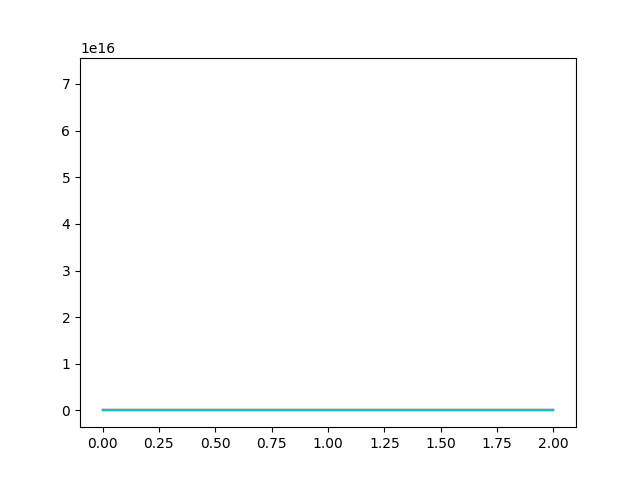

In [84]:
figure()
n = 3
for p in pkts:
    plot(p['bat'][:n])


In [89]:
p.dtype

dtype([('frame_id', '<u8'), ('bat', '<u8'), ('beam_number', 'u1'), ('sample_number', 'u1'), ('channel_number', 'u1'), ('fpga_id', 'u1'), ('nprod', '<u2'), ('flags', 'u1'), ('zero1', 'u1'), ('version', '<u4'), ('zero3', '<u4'), ('data', '<i2', (1, 465, 2, 2))])